In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
import shap

import sys, os
sys.dont_write_bytecode = True

import conditions, gen_data, analysis

import random
random.seed(1107)
np.random.seed(1107)

import warnings
warnings.filterwarnings('ignore')

PATH = 'SHAP'
os.makedirs(PATH, exist_ok = True)

In [2]:
plt.rcParams['font.size'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['font.family'] = 'Hiragino sans'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.major.width'] = 1.0
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['axes.grid'] = False
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 2
plt.rcParams["legend.markerscale"] = 2
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["legend.edgecolor"] = 'black'
plt.rcParams.update({'mathtext.default':  'regular' })

In [9]:
condition = conditions.calc_condition()
date, ML_model = condition['date'], condition['ML_model']
Reaction, data_sheet_name = condition['Reaction'], condition['data_sheet_name']
target_name = condition['target_name']
pgm_model, add_model, supp_model = condition['pgm_model'], condition['add_model'], condition['supp_model']

converted = analysis.analysis_data_convert(condition, data_sheet_name, use_models=[pgm_model, add_model, supp_model], idx=None)
feat, target = converted['feat'], converted['target']
feat_cols = feat.columns

20220311 rwgs_250 all data


shap summary_plot ETR


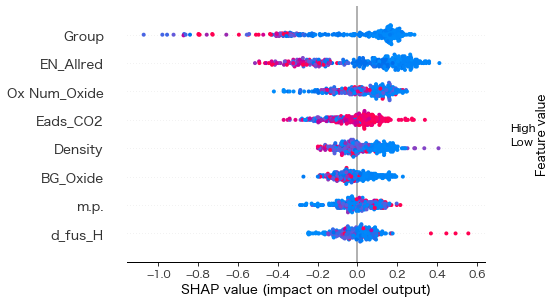

In [10]:
print('shap summary_plot ETR')
model = ExtraTreesRegressor(n_estimators=100, random_state=1107, n_jobs=4)
model.fit(feat, target)

explainer = shap.TreeExplainer(model=model)
shap_values = explainer.shap_values(feat)

shap.summary_plot(shap_values, feat, feat.columns, color_bar=True, show=False)
plt.savefig(f"{PATH}/{date}_shap_summary_{ML_model}_prop{pgm_model}{add_model}{supp_model}.png", format="png", dpi=600, bbox_inches='tight')

No. 193
Si 2.0 Zr 3.0 Mo 3.0 Re 3.0 H 0.0
CO form rate (mmol min-1 gcat-1): 3.06


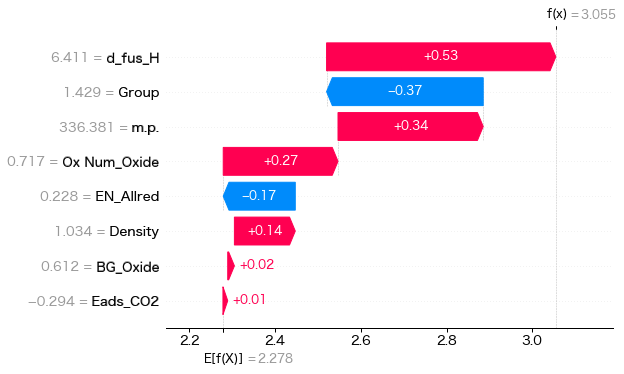

In [17]:
data = converted['data']
model = ExtraTreesRegressor(n_estimators=100, random_state=1107, n_jobs=4)
model.fit(feat, target)

#explainer = shap.TreeExplainer(model, feat)
#shap_values = explainer.shap_values(feat)

explainer = shap.Explainer(model, feat)
shap_values = explainer(feat)

No = 193
print('No.', data['No.'][No-1])
print(
    data['Ad1'][No],data['Ad1_wt%'][No],data['Ad2'][No],data['Ad2_wt%'][No],data['Ad3'][No],data['Ad3_wt%'][No],
    data['Ad4'][No],data['Ad4_wt%'][No],data['Ad5'][No],data['Ad5_wt%'][No]
    )
print('CO form rate (mmol min-1 gcat-1):', round(data[target_name][No], 2))
shap.plots.waterfall(shap_values[No], max_display=11, show=False)
plt.savefig(f"{PATH}/{date}_shap_waterfall_{ML_model}_prop{pgm_model}{add_model}{supp_model}_No{No}.png", format="png", dpi=600, bbox_inches='tight')

In [12]:
print('No.', data['No.'][i])

No. 3
